# Домашнее задание к лекции "Визуализация данных"

## Обязательная часть

Вам необходимо провести базовый EDA https://en.wikipedia.org/wiki/Exploratory_data_analysis выбранного набора данных.

### Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

### Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:

- данные приложений из Google Play - https://www.kaggle.com/lava18/google-play-store-apps;
- данные о видео из трендов YouTube - https://www.kaggle.com/datasnaek/youtube-new;
- данные об уровне счастья в разных странах - https://www.kaggle.com/unsdsn/world-happiness;
- данные по фильмам и сериалам Netflix - https://www.kaggle.com/shivamb/netflix-shows.

## Дополнительная часть (необязательная)

построить дополнительно не менее 2 визуализаций (итого не менее 6);
в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;

In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import date, time

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 17,5

In [13]:
# Analyse the air quality of a metropolitan city in Australian State of Queensland
aqi = pd.read_csv('brisbanecbdaq2017.csv',
                 names = ['Date', 'Time', 'Wind_Direction_degTN', 'Wind_Speed_m/s', 'Wind_Sigma_Theta_deg', 
                          'Wind_Speed_Std_Dev_m/s', 'Air_Temperature_degC', 'Relative_Humidity_%', 
                          'Rainfall_mm', 'Barometric_Pressure_hPa', 'PM10', 
                          'Visibility_Reducing_Particles'],
                 skiprows=1)

aqi.head(20)

,Date,Time,Wind_Direction_degTN,Wind_Speed_m/s,Wind_Sigma_Theta_deg,Wind_Speed_Std_Dev_m/s,Air_Temperature_degC,Relative_Humidity_%,Rainfall_mm,Barometric_Pressure_hPa,PM10,Visibility_Reducing_Particles
0,01/01/2017,00:00,10.0,0.9,41.9,0.6,27.0,73.5,0.0,1001.0,18.3,NaN
1,01/01/2017,01:00,357.0,0.7,46.4,0.6,26.7,72.3,0.0,1001.0,13.6,14.0
2,01/01/2017,02:00,355.0,0.5,50.6,0.5,26.3,72.2,0.0,1001.0,5.6,13.0
3,01/01/2017,03:00,360.0,0.5,179.8,0.5,26.0,73.2,0.0,1001.0,5.2,13.0
4,01/01/2017,04:00,5.0,0.5,55.0,0.6,25.4,75.6,0.0,1001.0,3.1,11.0
5,01/01/2017,05:00,356.0,0.9,41.0,0.6,25.4,76.2,0.0,1002.0,2.4,13.0
6,01/01/2017,06:00,350.0,0.6,58.1,0.6,26.8,70.4,0.0,1003.0,5.4,15.0
7,01/01/2017,07:00,342.0,1.0,44.0,0.9,28.4,64.0,0.0,1003.0,8.8,10.0
8,01/01/2017,08:00,351.0,1.3,42.0,0.9,29.7,58.1,0.0,1003.0,7.0,9.0
9,01/01/2017,09:00,349.0,1.1,48.7,0.9,31.4,52.1,0.0,1003.0,4.8,9.0


In [14]:
aqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           8760 non-null   object 
 1   Time                           8760 non-null   object 
 2   Wind_Direction_degTN           8743 non-null   float64
 3   Wind_Speed_m/s                 8748 non-null   float64
 4   Wind_Sigma_Theta_deg           8748 non-null   float64
 5   Wind_Speed_Std_Dev_m/s         8748 non-null   float64
 6   Air_Temperature_degC           8748 non-null   float64
 7   Relative_Humidity_%            8748 non-null   float64
 8   Rainfall_mm                    8750 non-null   float64
 9   Barometric_Pressure_hPa        8750 non-null   float64
 10  PM10                           8466 non-null   float64
 11  Visibility_Reducing_Particles  8371 non-null   float64
dtypes: float64(10), object(2)
memory usage: 821.4+ K

In [15]:
aqi.describe()

,Wind_Direction_degTN,Wind_Speed_m/s,Wind_Sigma_Theta_deg,Wind_Speed_Std_Dev_m/s,Air_Temperature_degC,Relative_Humidity_%,Rainfall_mm,Barometric_Pressure_hPa,PM10,Visibility_Reducing_Particles
count,8743.000000,8748.000000,8748.000000,8748.000000,8748.000000,8748.000000,8750.000000,8750.000000,8466.000000,8371.000000
mean,160.821686,0.743770,69.729607,0.595496,21.981287,63.210654,0.079874,1012.850857,13.499858,20.907418
std,93.749731,0.556014,36.056586,0.264176,4.436431,15.746823,0.917287,4.854476,7.452908,16.136563
min,0.000000,0.000000,17.700000,0.100000,9.000000,13.700000,0.000000,993.000000,-3.800000,1.000000
25%,84.000000,0.300000,44.900000,0.400000,18.700000,53.100000,0.000000,1010.000000,8.300000,11.000000
50%,189.000000,0.600000,59.900000,0.500000,22.100000,65.200000,0.000000,1013.000000,12.100000,17.000000
75%,217.000000,1.100000,81.100000,0.800000,25.100000,75.000000,0.000000,1016.000000,17.200000,25.000000
max,360.000000,3.200000,205.200000,1.900000,35.800000,93.700000,38.000000,1025.000000,65.600000,244.000000


In [16]:
# График уровня Visibility_Reducing_Particles (Частицы, уменьшающие видимость) по датам/часам

# Берем из DataFrame aqi столбцы Date, Time и Visibility_Reducing_Particles.
# Создаем DataFrame df с двумя столбцами - Date+Time и Visibility_Reducing_Particles
df = pd.concat([aqi.Date + ' ' + aqi.Time, aqi.Visibility_Reducing_Particles], axis=1)
df.columns = ['DateTime', 'Visibility_Reducing_Particles']

# Перебирает DataFrame df. Переводим значение из столбца DateTime в формат datetime.
# Формируем новый DataFrame vrp_by_datetime (частитцы отражающие видимость по дате и времени)
vrp_by_datetime = pd.DataFrame(columns = ['DateTime', 'Visibility_Reducing_Particles'])
i = 0
for row in df.iterrows():
    str_ = df.DateTime[i]
    vrp_by_datetime.loc[i] = [dt.strptime(str_, '%d/%m/%Y %H:%M'), 
                                                    df.Visibility_Reducing_Particles[i]]
    i += 1

vrp_by_datetime.head()

,DateTime,Visibility_Reducing_Particles
0,2017-01-01 00:00:00,NaN
1,2017-01-01 01:00:00,14.0
2,2017-01-01 02:00:00,13.0
3,2017-01-01 03:00:00,13.0
4,2017-01-01 04:00:00,11.0


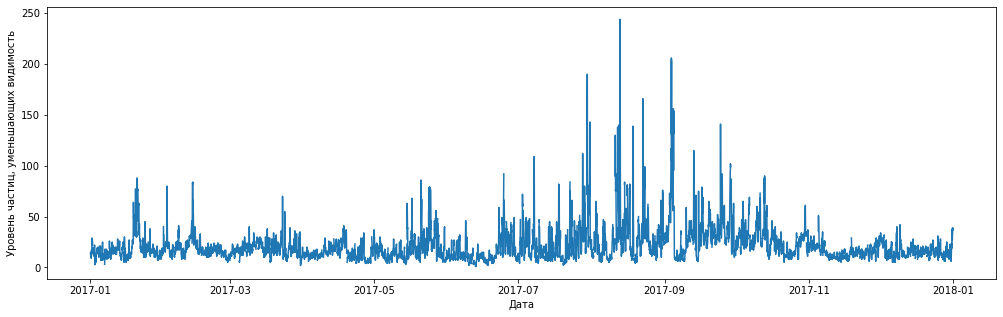

In [17]:
plt.xlabel('Дата')
plt.ylabel('Уровень частиц, уменьшающих видимость')
plt.plot(vrp_by_datetime.DateTime, vrp_by_datetime.Visibility_Reducing_Particles)

Вывод: по визуализации можно сделать вывод, что в мегаполисе штата Квинсленд уровень частит, уменьшающих видимость в воздухе в конца лета и осенью является повышен, если сравнивать с остальной частью года. Т.е. загрязнение воздуха возрастает в определенные месяцы года. Скорее всего - это связано с определенной деятельностью человека. При этом - это не результат работы промышленных предприятий, они по идее работают круглогодично. 

Можно предположить, что в этот период года (вторая половина лета и осень) температура воздуха в среднем становится ниже. Австралия в целом теплая страна. Но часто в теплых странах наступает период, когда днем очень тепло, а ночью намного прохладнее, т.е. большие перепады температур. Также в странах, где большую часть года тепло, дома могут строить, используя меньше утеплительных материалов. В итоге при похоладании жители начинают отапливать дома и другие помещения. Возможно часто используется печное отопление и в качестве топлива используются вещества, которые образую выбросы при сгорании. Как вариант - это уголь, поскольку Австралия одна из крупнейших стран по добыче угля. 

На графике видны резкие скачки. Похоже на выбросы, возможно ошибки. Но, возможно это реальные значения, которые были зафиксированы в самы холодные дни или дни, когда не было ветра или был туман. Т.е., возможно, это дни, когда погодные условия были таковы, что загрязнения, попадающие в воздух менее интенсивно рассеивались. Эти всплески, по правильному, стоит детальнее проанализировать и сравнить с показаниями по погоде в эти моменты. Думаю тогда можно будет лучше понять ошибки это или нет.

На самом деле, на мой взгляд, график перегружен значениями, хотя динамика вырисовывается. На всякий случай, для проверки, можно сделать визуалицаю по медианному значению уровеня частит, уменьшающих видимость с группировкой по месяцам.

<ipython-input-18-bb87cb105587>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vrp_by_month_median['Month'] = vrp_by_month_median['Date'].apply(month_from_date)


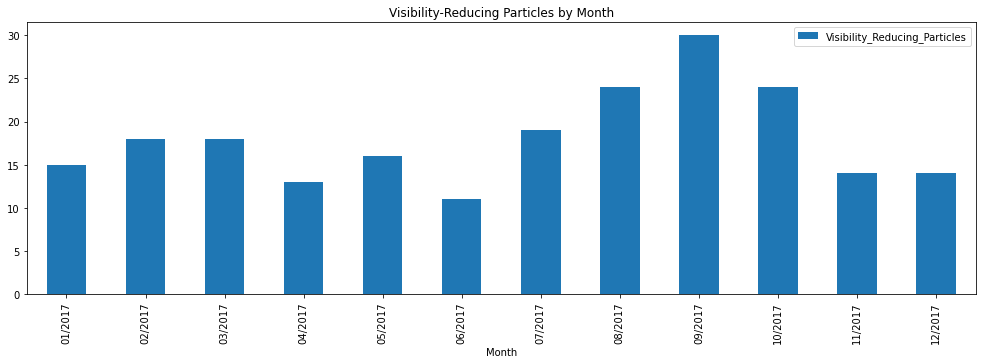

In [18]:
def month_from_date(date):
    return date[3:]

# Формируем дф vrp_by_month_median, взяв стобцы Data и Visibility_Reducing_Particles из дф aqi
vrp_by_month_median = aqi[['Date', 'Visibility_Reducing_Particles']]

# Пропускаем столбец дф Visibility_Reducing_Particles через ф-ию month_from_date.
# Формируем в дф Visibility_Reducing_Particles столбец Month с цифрой месяца.
vrp_by_month_median['Month'] = vrp_by_month_median['Date'].apply(month_from_date)

# Группируем значения столбца Visibility_Reducing_Particles по месяцам.
# Вычисляем медианное значение Visibility_Reducing_Particles для каждого месяца.
vrp_by_month_median = vrp_by_month_median[['Month', 'Visibility_Reducing_Particles']].groupby('Month').median()

vrp_by_month_median.reset_index()

vrp_by_month_median.plot(kind='bar', 
                         title='Visibility-Reducing Particles by Month')

Вывод: можно сказать, что предыдущий вывод подтверждается. Количество выбросов во второй половине лета и осенью возрастает. Пик приходится на сентябрь, август и октябрь тоже показания повышенные. 

In [19]:
# Соберем датафрейм с основными покзателяи (скорость ветра, температура воздуха, влажность, давление),
# которые, на мой взгляд, могут влиять на загрязнение воздуха (PM10 и Visibility_Reducing_Particles)

def month_from_date(date):
    return date[3:]

all_indicators = aqi[['Date', 
                   'Wind_Speed_m/s', 
                   'Air_Temperature_degC', 
                   'Relative_Humidity_%', 
                   'Barometric_Pressure_hPa',
                   'PM10',
                   'Visibility_Reducing_Particles']]

all_indicators['Month'] = vrp_ws_at_r['Date'].apply(month_from_date)

all_indicators = all_indicators[['Month', 
                                 'Wind_Speed_m/s', 
                                 'Air_Temperature_degC', 
                                 'Relative_Humidity_%', 
                                 'Barometric_Pressure_hPa',
                                 'PM10',
                                 'Visibility_Reducing_Particles']]

all_indicators.head()

NameError: name 'vrp_ws_at_r' is not defined

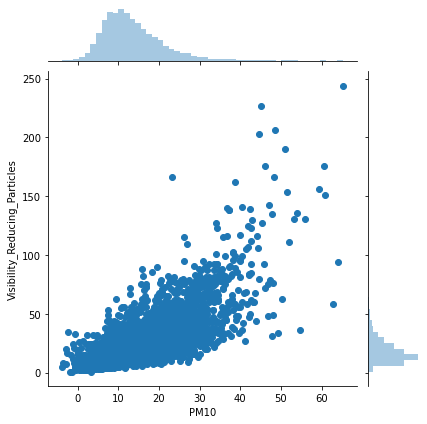

In [325]:
# Проверим взаимосвязь уровня PM10 и уровня частиц, уменьшающих видимость.

sns.jointplot(kind='scatter',
              data=all_indicators,
              x='PM10', 
              y='Visibility_Reducing_Particles')

Вывод: количество частиц, уменьшающих видисть растет с ростом увеличения уровня PM10. Получается частицы PM10 загрязняют воздух.

In [10]:
# Соберем датафрейм из значений температуры воздуха, уровня PM10 и частиц уменьшающих видимость.
# Сгруппируем показатели по месяцам и посчитаем медиану для каждого показателя.

vrp_by_air_temp = all_indicators[['Month', 'Air_Temperature_degC', 'PM10', 'Visibility_Reducing_Particles']]

vrp_by_air_temp = vrp_by_air_temp.groupby('Month').median()

vrp_by_air_temp.plot(kind='bar')

KeyError: "['Month'] not in index"

Вывод: можно заметить, что период со второй половины лета по первую половину осени - это период, когда средняя (медиана) температура воздуха снижается. Одновременно со снижением температуры воздуха возрастают показатели PM10 и частиц уменьшающих видимость. Значит выброс PM10 и загрязнение воздуха зависят от его температуры - при потеплении выбросы и загрязнение уменьшаются и увеличиваются во время похоладания.

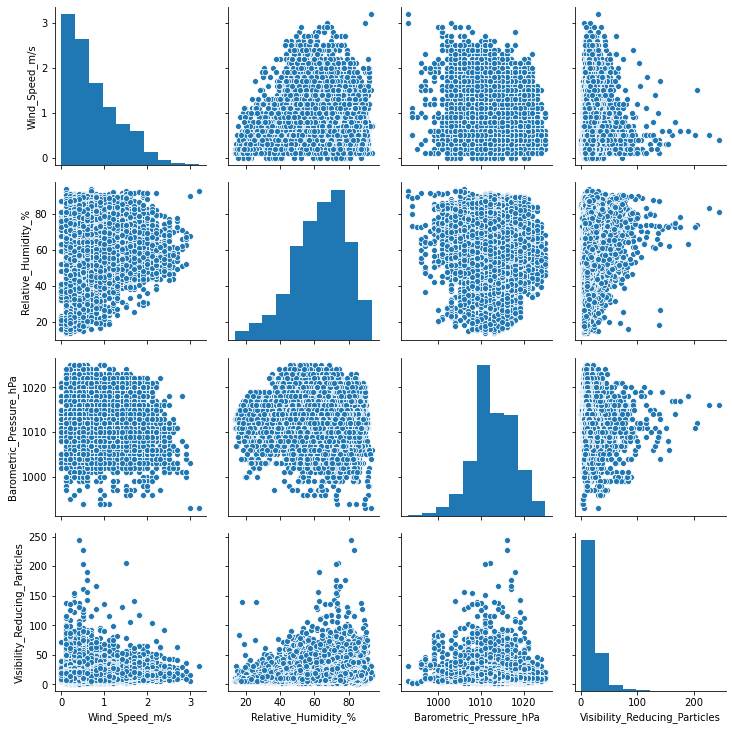

In [344]:
sns.pairplot(all_indicators[['Wind_Speed_m/s', 
                             'Relative_Humidity_%', 
                             'Barometric_Pressure_hPa',
                             'Visibility_Reducing_Particles']])

Вывод (по визуализациям, где видно связь загрязнения воздуха с погодными условиями http://joxi.ru/L21ZbObi0DD3DA?d=1):
1) При увеличении скорости ветра загрязнение воздуха уменьшается. Т.е. ветер выдувает частицы PM10 и их концентрация снижается. Но есть и минус. Вероятно ветер эти частицы разносит по сторонам, в зависимости от направления ветра. Получается в чистом регионе воздух может стать загрязненным при увеличении ветра, если ветер дует с региона с грязным воздухом.
2) При увеличении влажности концентрация загрязняющих воздух частиц увеличвается. Вероятно влага в воздухе делает загрязняющие частицы более тяжелыми и они оседают ближе к поверхности земли, где стоят датчики фиксации качества воздуха.
3) Прямой или обратной зависимости качества воздуха от атмосферного давления не наблюдаю. Но, отметил бы, что, когда давление находится в райное минимума и максимума, воздух чище. Возможно при отклонении атмосферного давления в меньшую или большую сторону происходят какие-то изменения в погоде, которые в свою очередь влияют на качество воздуха. Например, видно, что на максимальных и минимальных значениях давления увеличивается влажность, которая в свою очередь ухудшает качество воздуха. Также yf визуализации ниже видно, что при увеличении давления падает температура воздуха, что тоже приводик к ухудшению качества воздуха.

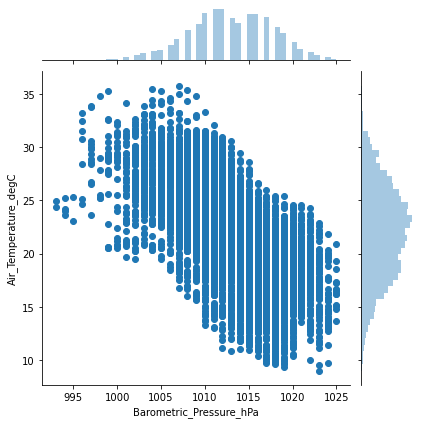

In [346]:
sns.jointplot(kind='scatter',
              data=all_indicators,
              x='Barometric_Pressure_hPa', 
              y='Air_Temperature_degC')

<ipython-input-386-f5b13f7742a3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_indicators['Month'] = vrp_ws_at_r['Date'].apply(month_from_date)


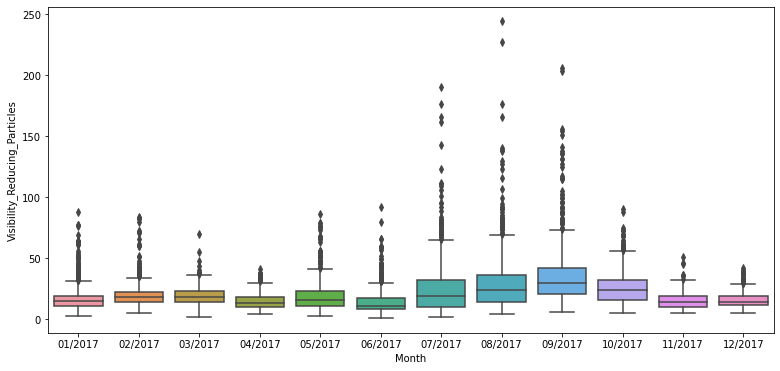

In [386]:
all_indicators = aqi[['Date', 
                      'Wind_Speed_m/s', 
                      'Air_Temperature_degC', 
                      'Relative_Humidity_%', 
                      'Barometric_Pressure_hPa',
                      'PM10',
                      'Visibility_Reducing_Particles']]

all_indicators['Month'] = vrp_ws_at_r['Date'].apply(month_from_date)

sns.boxplot(x="Month", 
            y="Visibility_Reducing_Particles", 
            data=all_indicators)

Вывод: опять же можно заметить, что пик загрязненности воздуха приходится на сентябрь. Также достаточно низкие показатели по качеству воздуха в июле-августе и сентябре. Именно в эти месяцы (июль-октябрь) высокие медианные значения и достаточно большой разброс вокруг медианы. Также высокий верхний ус и много выбросов, иногда выбросы совсем высоко. Т.е. много достаточно высоких значений, много дней, когда воздух был грязным. Есть дни, когда воздух критически грязный (выбросы).

Еще можно отметить, что в июле медиана совпадает (приблизительно) с февралем и мартом и чуть больше остальных месяцев. Но при этом разброс вокруг медианы больше, т.е. июле чаще бывает грязный воздух.